# Simple example to illustrate SGDClassifier

A series of points on the 2D plane are labeled by the colors ['red', 'green', 'blue']

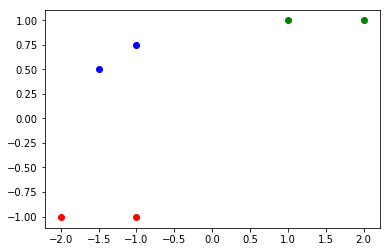

In [1]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1],[-1.5,0.5],[-1,0.75]])
Y = np.array([1, 1, 2, 2, 3, 3])
cols = ['red', 'green', 'blue']

plt.scatter(X[:,0][Y==1],X[:,1][Y==1],c=cols[0])
plt.scatter(X[:,0][Y==2],X[:,1][Y==2],c=cols[1])
plt.scatter(X[:,0][Y==3],X[:,1][Y==3],c=cols[2])
plt.show()

We need to segregate the points in their own colored groups. This is what the SGDClassifier does. It classifies each point to their own group. We labeled the colors with numerical values in Y. 
red is Y=1, blue is Y=2, green is Y=3.

## Train the SGD Classifier

In [0]:
# import the classifier
from sklearn import linear_model

# set up the SGDClassifier object by passing tunable parameters to the constructor
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)

We can set the tolerance to 0.001 (=10^-3=1e-3). If the SVM cost function has a value below that then we are satisfied with the support vector decision boundary (the plane with separates two classes of points). Now we fit the model.

In [3]:
clf.fit(X,Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

clf.fit() generates 3 different hyperplanes which separates the classes. 
The coefficients and intercept of the hyperplane are stored in clf.coef_ and intercept_. 
There are 2 coefficients and 1 intercept for each hyperplane. There are 3 decision boundaries separating 3 color classes. 
Therefore, clf.coef_ is an array of size 3x2 (3 color classes and 2 intercepts). clf.intercept_ is an array of size 3x1.

In [4]:
clf.coef_

array([[  4.80307397, -21.61383285],
       [ 24.01536984,   4.80307397],
       [-18.99335233,  26.11585945]])

In [5]:
 clf.intercept_

array([ -9.91040812,  -0.02991027, -20.01880362])

In [6]:
for i in range(3):
  print("The equation of the hyperplane #", i+1, "is: ", np.round(clf.coef_[i,0],2)," x + ",np.round(clf.coef_[i,1],2)," y +  ",np.round(clf.intercept_[i],2)," = 0")

The equation of the hyperplane # 1 is:  4.8  x +  -21.61  y +   -9.91  = 0
The equation of the hyperplane # 2 is:  24.02  x +  4.8  y +   -0.03  = 0
The equation of the hyperplane # 3 is:  -18.99  x +  26.12  y +   -20.02  = 0


## Plotting the decision boundaries

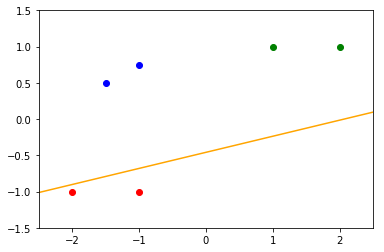

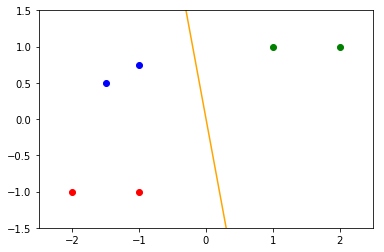

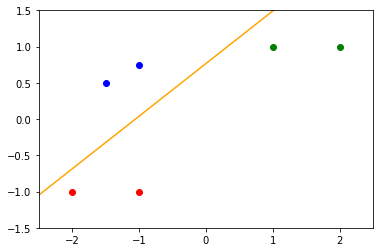

In [7]:
x = np.array([-2.5, 2.5])

for i in range(3):
  # the following line can easily be looped but we kept it for code readability 
  plt.scatter(X[:,0][Y==1],X[:,1][Y==1],c=cols[0])
  plt.scatter(X[:,0][Y==2],X[:,1][Y==2],c=cols[1])
  plt.scatter(X[:,0][Y==3],X[:,1][Y==3],c=cols[2])

  y = -(x*clf.coef_[i,0] + clf.intercept_[i])/clf.coef_[i,1]
  
  plt.plot(x,y,c='orange')

  plt.xlim(-2.5,2.5)
  plt.ylim(-1.5,1.5)
  plt.show()

The equation of a 2D hyperplane is:
m1 x + m2 y + c = 0
or 
y = - (m1 x + c)/m2.
A straight is plotted using plt.plot(x,y) where x = list of x-coord and y=list of y-coord.
The line starts at x= -2.5 and ends at x=2.5. The y-coordinate is calculated from clf.coef_


### Plotting all decision boundaries

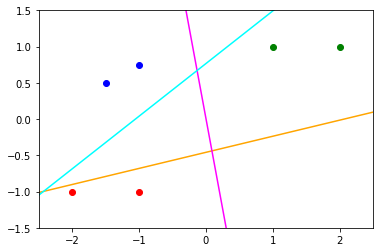

In [8]:
for i in range(3):
  plt.scatter(X[:,0][Y==i+1],X[:,1][Y==i+1],c=cols[i])

x = np.array([-2.5, 2.5])
y = np.zeros((3,2))
for i in range(3):
  y[i] = -(x*clf.coef_[i,0] + clf.intercept_[i])/clf.coef_[i,1]
  
plt.plot(x,y[0],c='orange')
plt.plot(x,y[1],c='magenta')
plt.plot(x,y[2],c='cyan')
plt.xlim(-2.5,2.5)
plt.ylim(-1.5,1.5)
plt.show()

## Predict the class

Let's say we have a point at (1,0.5) whose class we want to predict. By inspecting the above plot of the colored points it is clear that is a green point. Let's test our intuition.

In [9]:
# remind ourselves of the numerical values assigned to the colors
# Y = np.array([1, 1, 2, 2, 3, 3])
# cols = ['red', 'green', 'blue']
p = [[1,0.5]]
clf.predict(p)

array([2])

2 == green. So the point is correctly classified. It is important to note the dimensions of the list object passed to clf.predict(). p=[1,0] will result in an error as clf.predict() expects a list of points not just one point.

In [0]:
# test other points here

# Classifying petals from Iris dataset

In [0]:
# import Iris dataset
from sklearn import datasets

import numpy as np
np.set_printoptions(suppress=True) # to prevent numpy printing values in exponential notation
import matplotlib.pyplot as plt

# load the iris dataset
iris = datasets.load_iris()
x_iris, y_iris = iris.data, iris.target

In [12]:
# list contents of the Iris dataset
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [13]:
# petals will be classified based on these features 
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Data scaling

The data needs to be scaled(normalized) before it can be used in a classifier.

In [0]:
# to normalize (scale) data sets
from sklearn import preprocessing

### Normalize data by converting everything to their z-scores (also called scaling) 

Normalize using full data set. If normalized with the training set only then the scaled data will be different as as the mean and std of the training data is different form the full data set. However, it does affect the result since the relative scaling diffences do not affect the location of the decision boundary. This is why some authors get away with scaling w.r.t to the training set instead of the full dataset.

In [15]:
scaler = preprocessing.StandardScaler().fit(x_iris)
x_iris = scaler.transform(x_iris)
x_iris[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

## Split data into training and test sets

If the SGDClassifier is trained on the full dataset, we will suffer from overfitting (high variance, see 
[this chart](https://cdn-images-1.medium.com/max/800/1*xwtSpR_zg7j7zusa4IDHNQ.png) (source: towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229 ) for a concise explanation. We would want to split the dataset into a training set and a testing set both selected randomly. We run the classifier on training set and use the generated classifier to predict the values of the testing set. 

There are multiple ways to do the train-test split. The most intensive is leave one out cross-validation (LOOCV) which leaves out a single point as the test set and runs the traiing on the erst of the dataset. This is done repeatedly for every point in the dataset. It is computationally intensive. So it is better to do a 75-25 test train split used here by setting *test_size=0.25*. 75% of Iris data set is set aside as training set and the rest will be used for testing the prediction of the classifier. The training set is randomly sampled. The random seed can be set using *random_state*.






In [0]:
# for splitting data set into traiing and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x_iris, y_iris, test_size=0.25, random_state=34)

# Plot the data

## Plot only first 2 features (Sepal length, Sepal width)

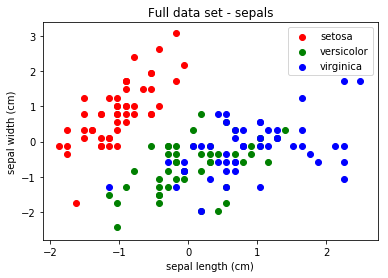

In [17]:
cols = ['red','green','blue']

for i in range(3):
    plt.scatter(x_iris[:,0][y_iris==i], x_iris[:,1][y_iris==i], c=cols[i])
plt.legend(iris.target_names)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Full data set - sepals")
plt.show()

### Plot the train-test split

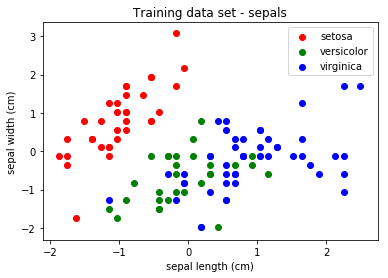

In [18]:
for i in range(3):
    plt.scatter(x_train[:,0][y_train==i], x_train[:,1][y_train==i], c=cols[i])
plt.legend(iris.target_names)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Training data set - sepals")
plt.show()    

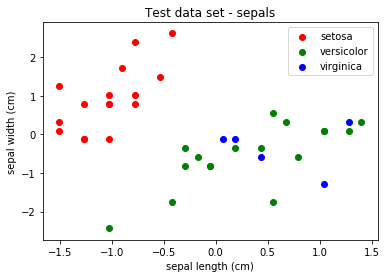

In [19]:
for i in range(3):
    plt.scatter(x_test[:,0][y_test==i], x_test[:,1][y_test==i], c=cols[i])
plt.legend(iris.target_names)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Test data set - sepals")
plt.show()    

## Plot only last 2 features (Petal length, Petal width)

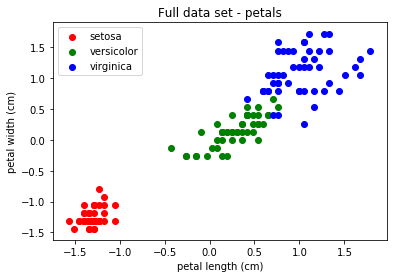

In [20]:
for i in range(3):
    plt.scatter(x_iris[:,2][y_iris==i], x_iris[:,3][y_iris==i], c=cols[i])
plt.legend(iris.target_names)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title("Full data set - petals")
plt.show()

### Plot the train-test split

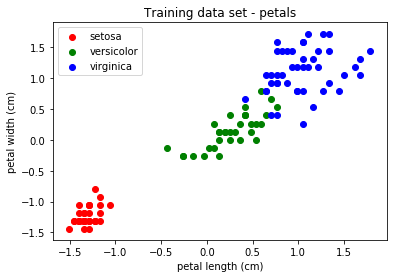

In [21]:
for i in range(3):
    plt.scatter(x_train[:,2][y_train==i], x_train[:,3][y_train==i], c=cols[i])
plt.legend(iris.target_names)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title("Training data set - petals")
plt.show()    

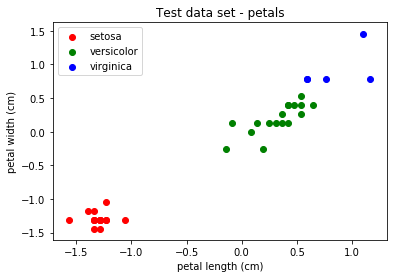

In [22]:
for i in range(3):
    plt.scatter(x_test[:,2][y_test==i], x_test[:,3][y_test==i], c=cols[i])
plt.legend(iris.target_names)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title("Test data set - petals")
plt.show()    

# Train the SGD Classifier

In [0]:
# import the classifier
from sklearn import linear_model

# set up the SGDClassifier object by passing tunable parameters to the constructor
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)

## Train classifier only on sepals

In [24]:
# select all rows and first 2 cols of x_train = x_train[:,:2] 
clf.fit(x_train[:,:2], y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
clf.coef_

array([[-21.56508834,  15.44469981],
       [ -8.69267421,  -4.10285677],
       [  8.30274495,  -4.90567638]])

In [26]:
clf.intercept_

array([-22.44541996,  -1.17007036,  -0.93079675])

One of the decision boundaries is a 4D hyperplane: - 6.89*(sepal length) + 2.77*(sepal width) - 8.23*(petal length) - 10.35*(petal width) - 19.88 = 0


In [27]:
for i in range(3):
  print("The equation of the hyperplane #", i+1, "is: ", np.round(clf.coef_[i,0],2)," x + ",np.round(clf.coef_[i,1],2)," y +  ",np.round(clf.intercept_[i],2)," = 0")

The equation of the hyperplane # 1 is:  -21.57  x +  15.44  y +   -22.45  = 0
The equation of the hyperplane # 2 is:  -8.69  x +  -4.1  y +   -1.17  = 0
The equation of the hyperplane # 3 is:  8.3  x +  -4.91  y +   -0.93  = 0


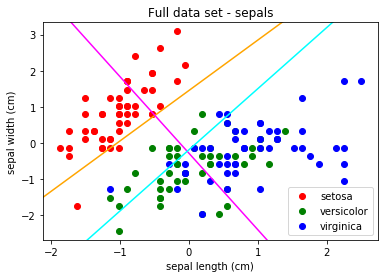

In [28]:
# plot the original dataset with color coded classes
cols = ['red','green','blue']

for i in range(3):
    plt.scatter(x_iris[:,0][y_iris==i], x_iris[:,1][y_iris==i], c=cols[i])

    plt.legend(iris.target_names)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Full data set - sepals")

# define end points of x-coord of hyperplane
x = np.array([-2.5, 2.5])
y = np.zeros((3,2))
for i in range(3):
  y[i] = -(x*clf.coef_[i,0] + clf.intercept_[i])/clf.coef_[i,1]
  
plt.plot(x,y[0],c='orange')
plt.plot(x,y[1],c='magenta')
plt.plot(x,y[2],c='cyan')


plt.xlim(x_iris[:,0].min()-0.25,x_iris[:,0].max()+0.25)
plt.ylim(x_iris[:,1].min()-0.25,x_iris[:,1].max()+0.25)


plt.show()

While SGDClassifier was able to separate "setosa" flowers it was not able to separate the other two flowers. Not even humans can separate those intermingled categories. 

In [0]:
# test code here

### Calculating Error Rate

#### Test accuracy of predictions on the training dataset

In [0]:
# import the metrics clas to quantify the quality of predictions 
from sklearn import metrics

In [31]:
# try to predict y_train from x_train
y_train_predict = clf.predict(x_train[:,:2])

# calculate the accuracy score
score_train = metrics.accuracy_score(y_train, y_train_predict)

score_train

0.7410714285714286

#### Test accuracy of predictions on the test dataset

In [32]:
# try to predict y_test from x_test
y_test_predict = clf.predict(x_test[:,:2])

# calculate the accuracy score
score_test = metrics.accuracy_score(y_test, y_test_predict)

score_test

0.6052631578947368

Compare the original test data with the predicted test data

In [33]:
# print(y_test)
# print(y_test_predict)
print(y_test - y_test_predict)
# non-zero values are incorectly predicted

[-1  0  0  0  0  0  0  0 -1 -1 -1 -1  0 -1  0  0  0  0 -1  0  0 -1 -1  0
  0 -1  0  0 -1  0  0 -1  0 -1  0  0 -1 -1]


In [34]:
print(np.count_nonzero(y_test - y_test_predict), "data points incorrectly classified" )

15 data points incorrectly classified


Instead of manually counting the number of data points that are incorrectly classified we should use the **Confusion Matrix**


#### Confusion matrix

In [35]:
print(metrics.confusion_matrix(y_test, y_test_predict))

[[13  3  0]
 [ 0  5 12]
 [ 0  0  5]]


The sum of non-diagonal elements of the confusion matrix is the number of misclassifications. The columns represent predicted classes and rows are original classes. So if element (2,1) is equal to 3, it implies that 3 points which should have been classifies as "2" is classified as "1". 

#### Classification Report

In [36]:
print(metrics.classification_report(y_test, y_test_predict, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      0.81      0.90        16
  versicolor       0.62      0.29      0.40        17
   virginica       0.29      1.00      0.45         5

    accuracy                           0.61        38
   macro avg       0.64      0.70      0.58        38
weighted avg       0.74      0.61      0.62        38



Precision = TP/(TP+FP)
Recall = TP/(TP + FN)
Precision determines how many of the data points classified as class 1 is really class 1. If this is low then there are too many False Positives.
Recall determines how many of the data points belonging to class 1 are correctly classified. If this is low then classifier is not working well at all.

## Train classifier only on petals

In [37]:
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
# select all rows and lst 2 cols of x_train = x_train[:,2:] 
clf.fit(x_train[:,2:], y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
clf.coef_

array([[-8.74078657, -6.64928327],
       [ 7.66498885, -4.52582311],
       [21.56812502, 13.39735035]])

In [39]:
 clf.intercept_

array([ -9.95012965,  -1.49600544, -23.17226566])

In [40]:
for i in range(3):
  print("The equation of the hyperplane #", i+1, "is: ", np.round(clf.coef_[i,0],2)," x + ",np.round(clf.coef_[i,1],2)," y +  ",np.round(clf.intercept_[i],2)," = 0")

The equation of the hyperplane # 1 is:  -8.74  x +  -6.65  y +   -9.95  = 0
The equation of the hyperplane # 2 is:  7.66  x +  -4.53  y +   -1.5  = 0
The equation of the hyperplane # 3 is:  21.57  x +  13.4  y +   -23.17  = 0


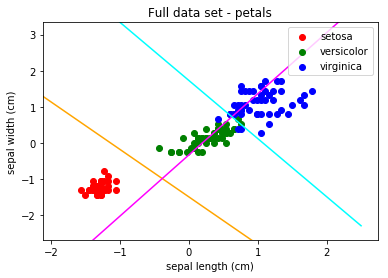

In [41]:
# plot the original dataset with color coded classes
cols = ['red','green','blue']

for i in range(3):
    plt.scatter(x_iris[:,2][y_iris==i], x_iris[:,3][y_iris==i], c=cols[i])

    plt.legend(iris.target_names)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Full data set - petals")

# define end points of x-coord of hyperplane
x = np.array([-2.5, 2.5])
y = np.zeros((3,2))
for i in range(3):
  y[i] = -(x*clf.coef_[i,0] + clf.intercept_[i])/clf.coef_[i,1]
  
plt.plot(x,y[0],c='orange')
plt.plot(x,y[1],c='magenta')
plt.plot(x,y[2],c='cyan')


plt.xlim(x_iris[:,0].min()-0.25,x_iris[:,0].max()+0.25)
plt.ylim(x_iris[:,1].min()-0.25,x_iris[:,1].max()+0.25)


plt.show()

### Calculating Error Rate

#### Test accuracy of predictions on the training dataset

In [42]:
# try to predict y_train from x_train
y_train_predict = clf.predict(x_train[:,2:])

# calculate the accuracy score
score_train = metrics.accuracy_score(y_train, y_train_predict)

score_train

0.9553571428571429

#### Test accuracy of predictions on the test dataset

In [43]:
# try to predict y_test from x_test
y_test_predict = clf.predict(x_test[:,2:])

# calculate the accuracy score
score_test = metrics.accuracy_score(y_test, y_test_predict)

score_test

1.0

Compare the original test data with the predicted test data

In [44]:
print( y_test - y_test_predict)
# non-zero values are incorectly predicted

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [45]:
print(np.count_nonzero(y_test - y_test_predict), "data points incorrectly classified" )

0 data points incorrectly classified


In [46]:
print(metrics.confusion_matrix(y_test, y_test_predict))

[[16  0  0]
 [ 0 17  0]
 [ 0  0  5]]


In [47]:
print(metrics.classification_report(y_test, y_test_predict, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00         5

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## Train classifier all features

In [57]:
clf = linear_model.SGDClassifier()
clf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [58]:
clf.coef_

array([[ -4.46252953,   4.61340313, -10.65343134,  -9.60233283],
       [ -0.6561952 ,  -0.39025588,  12.61477716,  -4.95286627],
       [ -6.25664629,   0.74469527,  34.98503807,  26.02507663]])

In [59]:
clf.intercept_

array([ -9.21955504,   0.34959315, -40.92460768])

In [60]:
for i in range(3):
  print("The equation of the hyperplane #", i+1, "is: ", np.round(clf.coef_[i,0],0)," x + ",np.round(clf.coef_[i,1],1)," y +  ", np.round(clf.coef_[i,0],2)," z + ",np.round(clf.coef_[i,1],3)," w +  ", np.round(clf.intercept_[i],2)," = 0")

The equation of the hyperplane # 1 is:  -4.0  x +  4.6  y +   -4.46  z +  4.613  w +   -9.22  = 0
The equation of the hyperplane # 2 is:  -1.0  x +  -0.4  y +   -0.66  z +  -0.39  w +   0.35  = 0
The equation of the hyperplane # 3 is:  -6.0  x +  0.7  y +   -6.26  z +  0.745  w +   -40.92  = 0


### Calculating Error Rate

#### Test accuracy of predictions on the training dataset

In [62]:
# try to predict y_train from x_train
y_train_predict = clf.predict(x_train)

# calculate the accuracy score
score_train = metrics.accuracy_score(y_train, y_train_predict)

score_train

0.9285714285714286

#### Test accuracy of predictions on the test dataset

In [64]:
# try to predict y_test from x_test
y_test_predict = clf.predict(x_test)

# calculate the accuracy score
score_test = metrics.accuracy_score(y_test, y_test_predict)

score_test

0.9210526315789473

In [65]:
print( y_test - y_test_predict)
# non-zero values are incorectly predicted

[0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [66]:
print(np.count_nonzero(y_test - y_test_predict), "data points incorrectly classified" )

3 data points incorrectly classified


In [67]:
print(metrics.confusion_matrix(y_test, y_test_predict))

[[16  0  0]
 [ 0 17  0]
 [ 0  3  2]]


In [68]:
print(metrics.classification_report(y_test, y_test_predict, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.85      1.00      0.92        17
   virginica       1.00      0.40      0.57         5

    accuracy                           0.92        38
   macro avg       0.95      0.80      0.83        38
weighted avg       0.93      0.92      0.91        38



It looks like the classification accuracy increases sharply when all the features are used to train the model (instead of just 2).

In [0]:
# test code here